This report is aimed to find the different factors infulence the possibility of surviving from the Titanic tragedy

For more detailed analysis, please read the process below

In [99]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [100]:
# import data
titanic_df = pd.read_csv('C:/Users/Administrator.MS-201606172131/Desktop/Intro_Programming/W6/project/titanic_data.csv')

In [101]:
# Read the first 8 rows of the data to identify the data structure
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [102]:
# Extrating the data related to the reseach questions above
sub_titanic_df = titanic_df[['Survived','Pclass','Age','Fare','Sex','Embarked']]

In [103]:
# Cleaning the missing value from the extracting data
dropna_sub_titanic_df = sub_titanic_df.dropna()

Question 1: What factors made people more likely to survive?

 1.1--Which gender survived more, male or female?-- male

 1.2--What's the mean age of survived and dead?-- 28.3 and 30.6

 1.3--Which kind of Pclass survived more?-- 3rd

 1.4--What's the mean Fare of survived and dead?--23 and 52 separetively

In [104]:
# Splitting the data into groups based on the criteria of Sex and count the numbers to find which gender survived more
# Which gender survived more, male or female?
# 93 males survied and 195 females survied, female survived more
# dropna_sub_titanic_df.groupby('Sex').Survived.sum()
dropna_sub_titanic_df.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            64
        1           195
male    0           360
        1            93
Name: Survived, dtype: int64

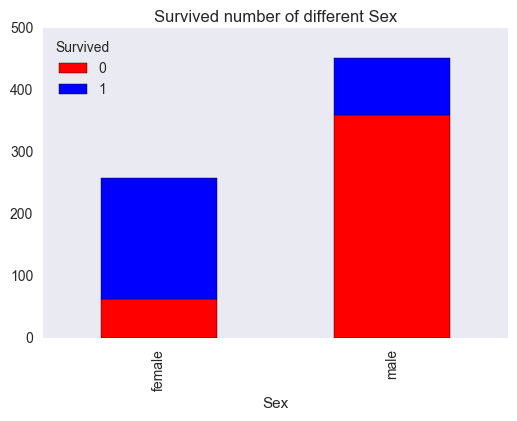

In [105]:
# draw bar chart to visualize above data
var1 = dropna_sub_titanic_df.groupby(['Sex','Survived']).Survived.count()
var1.unstack().plot(kind='bar',stacked=True,color=['red','blue'],grid=False, title = 'Survived number of different Sex')
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.hist(dropna_sub_titanic_df['Age'],bins=7)
#ax.set_xlabel("Age")
#var.plot(kind = 'bar')

In [106]:
# Splitting the data into groups based on the criteria of Sex and calculate the mean of male and female
dropna_sub_titanic_df.groupby('Sex').Age.mean()

Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64

In [107]:
# Splitting the data into groups based on the criteria of Pclass and count which kind of class survived more
# Which kind of Pclass survived more?
# People from the 3rd class, the lower class survived mroe. Pclass is a proxy for socio-economic status 
dropna_sub_titanic_df.groupby('Pclass').Survived.sum()

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64

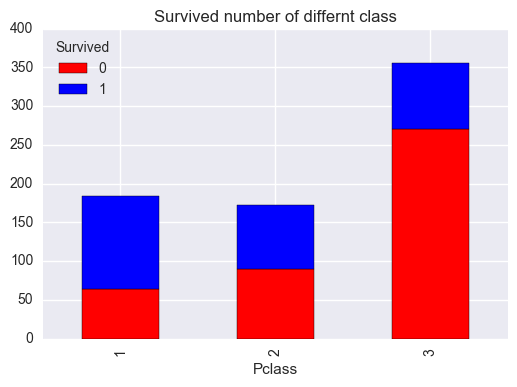

In [108]:
# draw bar chart to visualize above data
var1 = dropna_sub_titanic_df.groupby(['Pclass','Survived']).Survived.count()
var1.unstack().plot(kind='bar',stacked=True,color=['red','blue'],grid=True, title= 'Survived number of differnt class')

In [109]:
# Splitting the data into groups based on the criteria of Survived and count mean value of Age and Fare
# -What's the mean age of survived and dead?
# --The average age of survied people is lower than those dead, which can be concluded that younger people are more likely to survived
# -What's the mean Fare of survived and 
# --The average fare of survived is higher than dead, people pay more is more likely to survive.
dropna_sub_titanic_df.groupby('Survived').Fare.mean()

Survived
0    22.965456
1    51.647672
Name: Fare, dtype: float64

In [110]:
# Splitting the data into groups based on the criteria of Survived and count the number of the data
# -People embarked from where survived more?
# --People embarked from Southampton survived more
dropna_sub_titanic_df.groupby('Embarked').Survived.sum()

Embarked
C     79
Q      8
S    201
Name: Survived, dtype: int64

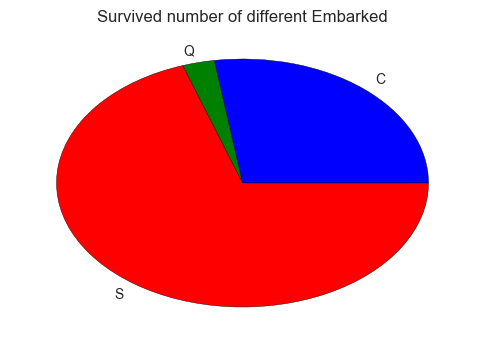

In [111]:
# draw a pie chart to show above data
data2 = dropna_sub_titanic_df.groupby('Embarked').Survived.sum()
labels1 = ('C','Q','S')
plt.pie(data2,labels=labels1)
plt.title("Survived number of different Embarked")  

Qusetion 1 answers:

1.The Gender, Age, Fare, and the Class people in, all affect people's likelihood to survive

 1.1--93 males survied and 195 females survied, female survived more
 
 1.2--People from the 3rd class, the lower class survived mroe. Pclass is a proxy for socio-economic status
 
 1.3--The average fare of survived is higher than dead, people pay more is more likely to survive.
 
 1.4--People in the higher class pay more fare than lower

Question 2：Are there any correlations between the fators affect the possibility of surviving?

 2.1--What's the correlation between Age and Pclass?--negative 

 2.2--What's the correlation between Age and Fare?--positive

 2.3--What's the correlation between Pclass and Fare?--negative

In [112]:
# Define the correlation function
def correlation(x,y):
    std_x = (x - x.mean())/ x.std(ddof = 0)
    std_y = (y - y.mean())/ y.std(ddof = 0)
    return (std_x * std_y).mean()

In [113]:
# Now try to find out the correlation between different variables
# Calculate the correlation between Age and Pclass
# negative relation
correlation(dropna_sub_titanic_df['Age'], dropna_sub_titanic_df['Pclass'])

-0.3659018613669347

In [114]:
# Calculate the correlation between Age and Fare
# positive relation
correlation(dropna_sub_titanic_df['Age'], dropna_sub_titanic_df['Fare'])

0.09314251789411503

In [115]:
# Calculate the correlation between Age and Pclass
#negative relation
correlation(dropna_sub_titanic_df['Fare'], dropna_sub_titanic_df['Pclass'])

-0.5528932206457569

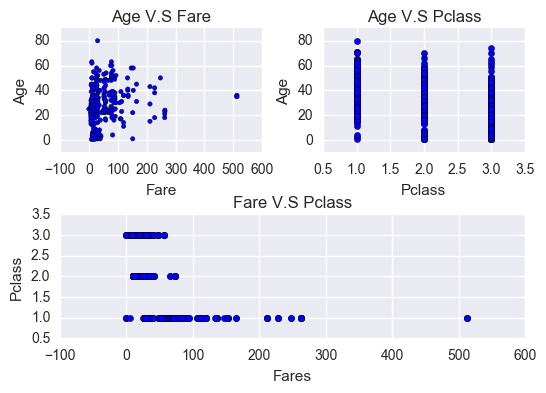

In [116]:
# Draw the plot to see the relationship between different factors
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1) #take the first place of the four-plot space
ax1.set_title("Age V.S Fare") #set title for the plot
ax1.set_ylabel("Age") # set y label
ax1.set_xlabel("Fare") # set x label

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Age V.S Pclass")
ax2.set_ylabel("Age")
ax2.set_xlabel("Pclass")

ax3 = fig.add_subplot(2,1,2)
ax3.set_title("Fare V.S Pclass")
ax3.set_ylabel("Pclass")
ax3.set_xlabel("Fares")
plt.subplots_adjust(wspace=0.3, hspace=0.5)#change the space between plots

ax1.scatter(dropna_sub_titanic_df['Fare'],dropna_sub_titanic_df['Age'],s=dropna_sub_titanic_df['Survived']*10)
ax2.scatter(dropna_sub_titanic_df['Pclass'],dropna_sub_titanic_df['Age'] )
ax3.scatter(dropna_sub_titanic_df['Fare'],dropna_sub_titanic_df['Pclass'] )


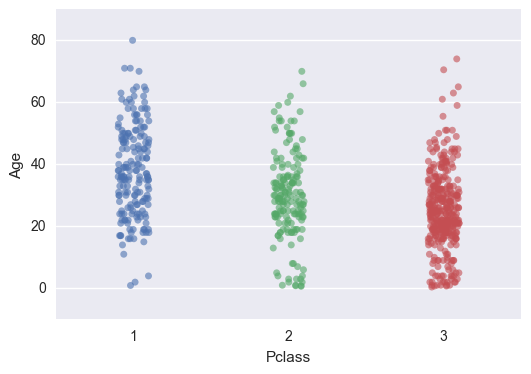

In [117]:
# expand the above to see more clearly
data6 = dropna_sub_titanic_df[['Pclass','Age']]
sns.stripplot(x='Pclass', y = 'Age',data = data6, jitter=True , edgecolor= 'none', alpha = .60)
sns.despine()
# from the chart below we can see that with the increase of class number, the density of age tend to be in younger age.

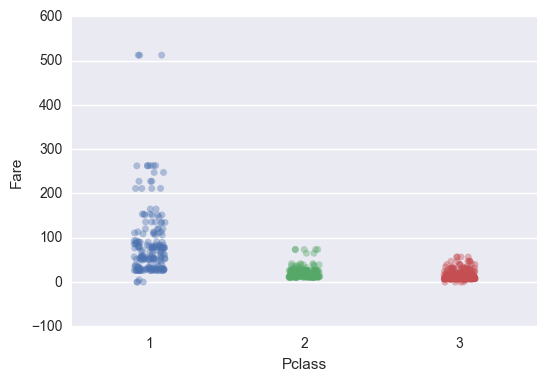

In [120]:
data6 = dropna_sub_titanic_df[['Pclass','Fare']]
sns.stripplot(x='Pclass', y = 'Fare',data = data6, jitter=True , edgecolor= 'none', alpha = .40)
sns.despine()

Qusetion2  answers:

2.There have some correlations between these factors, e.g., a positive relation between Age and Pclass. 

 2.1--The correlation between Age and Pclass is -0.37, negative, whichi means aged people are more likely to have higher social status(lower number)
 
 2.2--The correlation between Age and Fare is 0.09, slightly positive, with age grow, peole will need to pay more fare;
 
 2.3--The correlation between Fare and Pclass is -0.55, higher fare with lower number, or say, people in high status are  more willing to pay more fare

Conclusion:

Males, yong people, lower class, pay less, people with these attributes are more likely to survive. There have some correlations between these factors, the correlations between Age and Pclass, Fare and Pclass, are negative, while the correlation of that is slightly positive between Age and Fare.


Limitation: 

1.This report is base on the current daa and did not consider the environment, economy and other factors due to the limitation of the data.

2.The analysis method is only limited to descriptive analysis, and more statistical analysis should be done to testify the results.

3.The original dataset contains some missing value, and this report deleted those values, which may affect the results.